In [7]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

# csv_path下のファイルをすべて取得
csv_path = 'graph_csv'
files = os.listdir(csv_path)
# csvファイルの中身をdataframeに格納
csv_data = pd.DataFrame()
for file in files:
    if file.endswith('.csv'):
        data = pd.read_csv(os.path.join(csv_path, file))
        csv_data = pd.concat([csv_data, data])

csv_data = csv_data[csv_data['Step'] <= 1000]
csv_data = csv_data.drop('Step', axis=1)
csv_data = csv_data.loc[:,[not '__' in column for column in csv_data.columns]] # __が含まれる列を削除
csv_data.columns = [column.split(' ')[0] for column in csv_data.columns] # スペース以降を削除
csv_data.head()

,dreamerv3/medium/ih_15/room3/run4,dreamerv3/medium/ih_15/room3/run3,dreamerv3/medium/ih_15/room3/run2,dreamerv3/medium/ih_15/room3/run1,dreamerv3/medium/ih_15/room3/run0,dreamerv3/medium/ih_15/room2/run4,dreamerv3/medium/ih_15/room2/run3,dreamerv3/medium/ih_15/room2/run2,dreamerv3/medium/ih_15/room2/run1,dreamerv3/medium/ih_15/room2/run0,...,dreamerv3/small/ih_15/room0/run4,dreamerv3/small/ih_15/room0/run3,dreamerv3/small/ih_15/room0/run2,dreamerv3/small/ih_15/room0/run1,dreamerv3/small/ih_15/room0/run0,dreamerv3/medium/ih_15/room0/run1,dreamerv3/medium/ih_15/room0/run4,dreamerv3/medium/ih_15/room0/run3,dreamerv3/medium/ih_15/room0/run2,dreamerv3/medium/ih_15/room0/run0
0,-68.783363,-35.117059,-61.191529,-80.512613,-87.582752,-57.171899,-98.994802,-76.968855,-98.238169,-99.235533,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-84.731771,-73.820020,-48.648795,-60.618902,-41.117869,-98.009299,-97.671529,-39.474568,-93.856402,-70.307827,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-88.132748,-70.441115,-100.000000,-46.803212,-92.291571,-24.559520,-96.930480,-91.149714,-47.880785,-68.818688,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-16.066463,-48.766550,-49.172786,-75.421781,-70.538792,-51.074700,-81.510912,3.206641,-67.587471,-61.906323,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-51.962703,-81.065436,-34.283101,-58.300526,-45.088130,-91.979166,-55.376808,-63.967555,-57.856139,-70.026002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


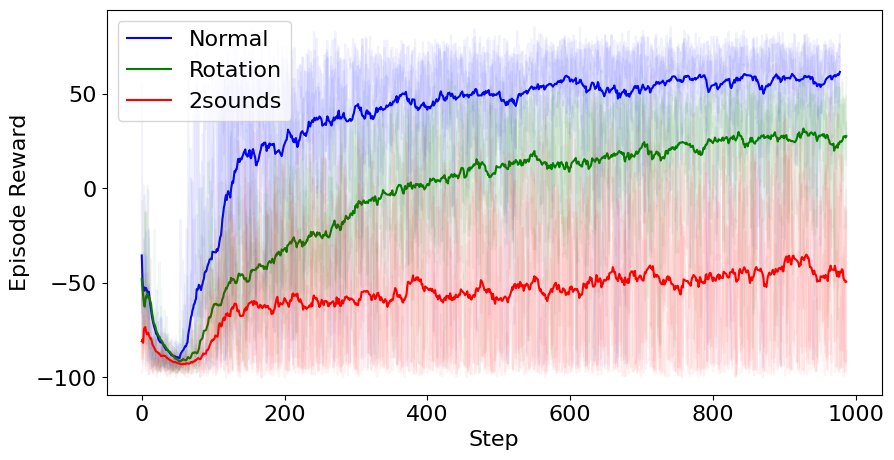

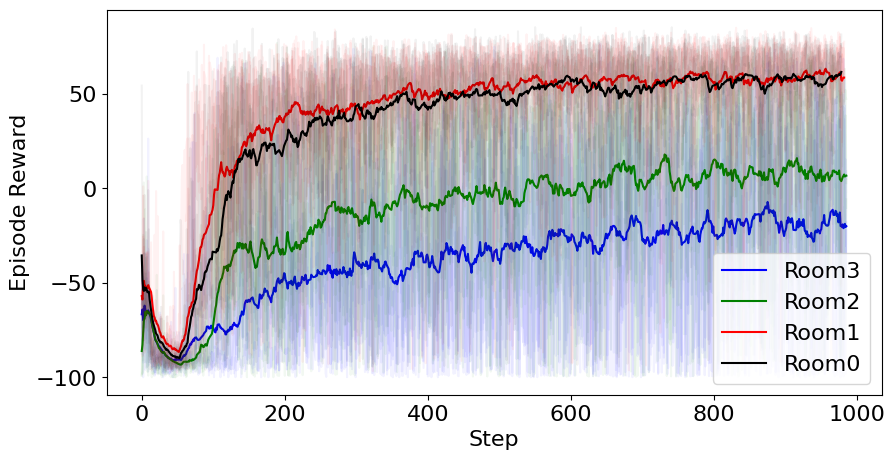

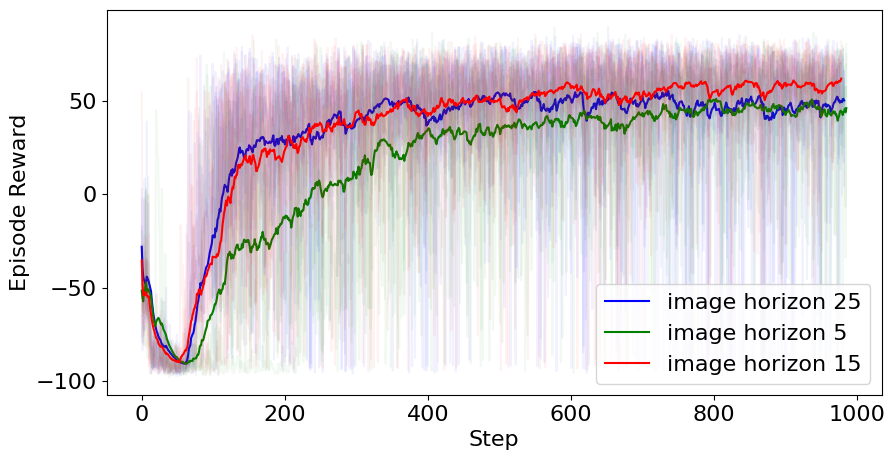

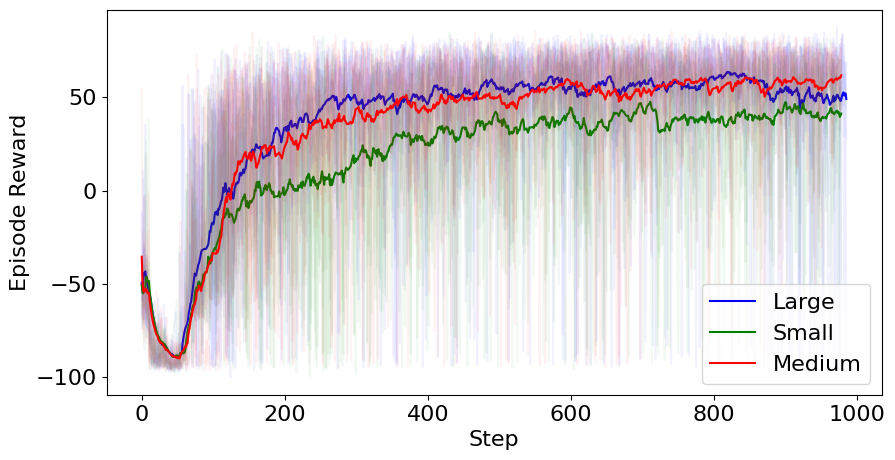

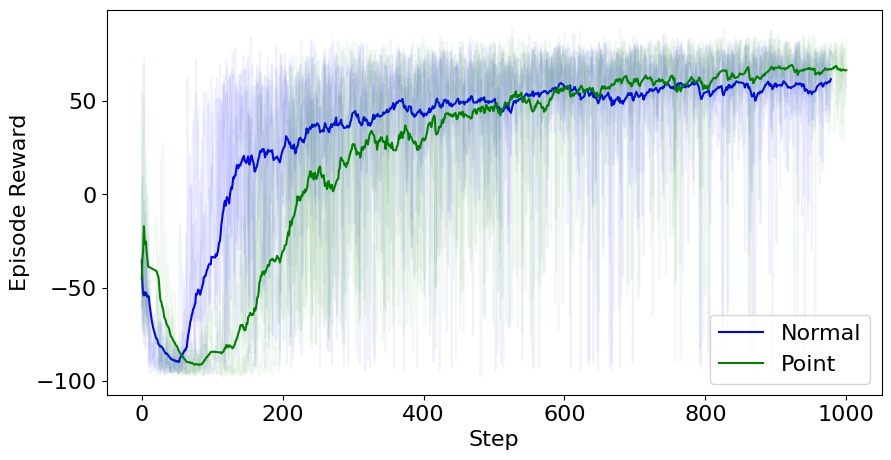

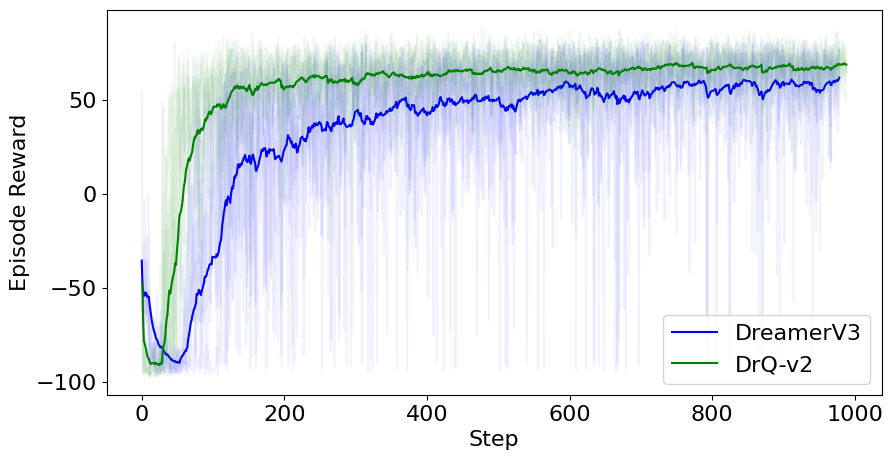

In [12]:
key_dict1 = {
    'Normal': 'medium/ih_15/room0',
    'Rotation': 'medium/ih_15/room0/rotation',
    '2sounds': 'medium/ih_15/room0/2sounds'
}
key_dict2 = {
    'Room3': 'medium/ih_15/room3',
    'Room2': 'medium/ih_15/room2',
    'Room1': 'medium/ih_15/room1',
    'Room0': 'medium/ih_15/room0'
}
key_dict3 = {
    'image horizon 25': 'medium/ih_25/room0',
    'image horizon 5': 'medium/ih_5/room0',
    'image horizon 15': 'medium/ih_15/room0'
}
key_dict4 = {
    'Large': 'large/ih_15/room0',
    'Small': 'small/ih_15/room0',
    'Medium': 'medium/ih_15/room0'
}
key_dict5 = {
    'Normal': 'medium/ih_15/room0',
    'Point': 'medium/ih_15/room0/alt_blue'
}
key_dict6 = {
    'DreamerV3': 'medium/ih_15/room0',
    'DrQ-v2': 'drqv2'
}
# key_dictとsmoothingの値を指定して，グラフを描画する
def draw_graph(key_dict, smoothing):
    color_list = ['b', 'g', 'r', 'k', 'w']
    # 図を描画
    plt.figure(figsize=(10, 5))
    plt.xlabel('Step')
    plt.ylabel('Episode Reward')
    count = 0
    for key, value in key_dict.items():
        data = csv_data.loc[:,[value in column for column in csv_data.columns]]
        if ('rotation' not in value) and ('2sounds' not in value) and ('alt_blue' not in value):
            data = data.loc[:,[not 'rotation' in column for column in data.columns]]
            data = data.loc[:,[not '2sounds' in column for column in data.columns]]
            data = data.loc[:,[not 'alt_blue' in column for column in data.columns]]
        data = data.dropna()
        # dataをプロット
        for column in data.columns:
            plt.plot(data[column], alpha=0.05, color=color_list[count])
        data = data.mean(axis=1)
        data = data.ewm(span=smoothing).mean()
        plt.plot(data, label=key, color=color_list[count])
        count += 1
    plt.legend()
    plt.show()

plt.rcParams.update({'font.size': 16})
smoothing = 20
draw_graph(key_dict1, smoothing)
draw_graph(key_dict2, smoothing)
draw_graph(key_dict3, smoothing)
draw_graph(key_dict4, smoothing)
draw_graph(key_dict5, smoothing)
draw_graph(key_dict6, smoothing)